In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous
%store -r Y_relative_footsteps_continuous
print(X_relative_footsteps_continuous.shape)
print(Y_relative_footsteps_continuous.shape)

(38598, 28)
(38598, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL is supporting
idxs = np.where(X_relative_footsteps_continuous[:, 23] == 0)[0]
X_relative_footsteps_continuous_RL_support = X_relative_footsteps_continuous[idxs]
Y_relative_footsteps_continuous_RL_support = Y_relative_footsteps_continuous[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_continuous_RL_support[0, :]

array([ 1.00000000e-01,  0.00000000e+00,  0.00000000e+00,  2.84895771e-02,
       -2.91453020e-02,  2.23710749e-02, -8.38189804e-04,  2.31294258e-02,
        9.54991797e-03,  2.23055032e-01,  1.73126695e-01, -4.09548272e-01,
        2.39919112e-01, -1.66095484e-01, -4.09774008e-01, -2.37248781e-01,
        1.66372462e-01, -4.12611949e-01, -2.53876758e-01, -1.60041555e-01,
       -4.13015290e-01,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.00000000e-01,  0.00000000e+00,  0.00000000e+00])

In [9]:
Y_relative_footsteps_continuous_RL_support[0, :]

array([ 0.23698767,  0.17026876,  0.23344301, -0.16811552, -0.24342878,
        0.16518854, -0.24083982, -0.16411242])

### Linear Regression

In [39]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RL_support[:, :3], # motion command
               X_relative_footsteps_continuous_RL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RL_support[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_RL_support[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_support_x = LinearRegression()

# Fit the model
model_rl_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9852926701881729
RMSE:  0.004196533445109343
The lowest error is:  1.2946144545833427e-06
The highest error is:  0.05578210628276753
The avg. error is:  0.0030588767133862414


In [40]:
model_rl_relative_support_x.coef_

array([[-1.18838987e-01, -1.88251417e-02,  4.37989970e-02,
        -2.24631158e-01,  6.69926467e-04, -2.45582501e-01,
         2.74189194e-01,  8.85290936e-01, -8.91867675e-02,
         9.19248629e-03,  6.65138195e-02]])

In [41]:
model_rl_relative_support_x.intercept_

array([0.15415616])

Text(0, 0.5, 'Predictions')

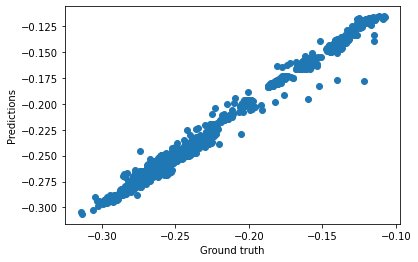

In [42]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [43]:
#%store model_rl_relative_support_x

In [44]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [45]:
# Save model
#joblib.dump(model_rl_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_support_x.sav")

### Predict RL foot -> y

In [51]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RL_support[:, :3], # motion command
               X_relative_footsteps_continuous_RL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RL_support[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_RL_support[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_support_y = LinearRegression()

# Fit the model
model_rl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9781536922794857
RMSE:  0.004128213200013814
The lowest error is:  2.106184816275114e-07
The highest error is:  0.04845122444954486
The avg. error is:  0.002777269653711283


In [52]:
model_rl_relative_support_y.coef_

array([[ 0.01181024, -0.18532179, -0.13370518,  0.13014812, -0.18112934,
         0.06781526,  0.22481193, -0.11915648,  1.05744577, -0.05901571,
        -0.0733179 ]])

In [53]:
model_rl_relative_support_y.intercept_

array([-0.04744741])

Text(0, 0.5, 'Predictions')

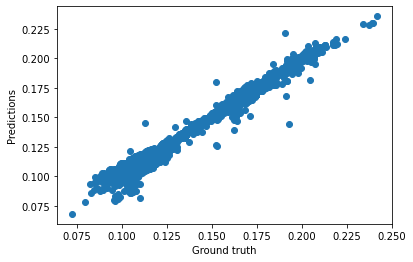

In [54]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [21]:
#%store model_rl_relative_support_y

In [22]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [24]:
# Save model
#joblib.dump(model_rl_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_support_y.sav")